<a href="https://colab.research.google.com/github/tkoide01/BikeShareRiderPredictor_UChicago_MachineLearningFinalProject/blob/main/CapitalBikeShareService_EDA1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
from matplotlib.ticker import FuncFormatter

# Set the display format for floating-point numbers
pd.options.display.float_format = '{:.2f}'.format

# Mount Google Drive: 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### 1. Load Bike Sharing Service CSV data into dataframe

# New Section

In [4]:
# Specify the directory path: 
path = "/content/drive/My Drive/MSCA31009MLPA_FinalProject/data/2010-2017"
!ls "/content/drive/My Drive/MSCA31009MLPA_FinalProject/data/2010-2017"

2010-capitalbikeshare-tripdata.csv    2014Q4-capitalbikeshare-tripdata.csv
2011-capitalbikeshare-tripdata.csv    2015Q1-capitalbikeshare-tripdata.csv
2012Q1-capitalbikeshare-tripdata.csv  2015Q2-capitalbikeshare-tripdata.csv
2012Q2-capitalbikeshare-tripdata.csv  2015Q3-capitalbikeshare-tripdata.csv
2012Q3-capitalbikeshare-tripdata.csv  2015Q4-capitalbikeshare-tripdata.csv
2012Q4-capitalbikeshare-tripdata.csv  2016Q1-capitalbikeshare-tripdata.csv
2013Q1-capitalbikeshare-tripdata.csv  2016Q2-capitalbikeshare-tripdata.csv
2013Q2-capitalbikeshare-tripdata.csv  2016Q3-capitalbikeshare-tripdata.csv
2013Q3-capitalbikeshare-tripdata.csv  2016Q4-capitalbikeshare-tripdata.csv
2013Q4-capitalbikeshare-tripdata.csv  2017Q1-capitalbikeshare-tripdata.csv
2014Q1-capitalbikeshare-tripdata.csv  2017Q2-capitalbikeshare-tripdata.csv
2014Q2-capitalbikeshare-tripdata.csv  2017Q3-capitalbikeshare-tripdata.csv
2014Q3-capitalbikeshare-tripdata.csv  2017Q4-capitalbikeshare-tripdata.csv


In [5]:
# Loop through the files:

all_data = pd.DataFrame()  # Create an empty DataFrame to store the concatenated data

for file_name in os.listdir(path):
    if file_name.endswith(".csv"):
        file_path = os.path.join(path, file_name)
        data = pd.read_csv(file_path)
        all_data = pd.concat([all_data, data], ignore_index=True)

In [6]:
# View the concatenated data:
all_data.head

<bound method NDFrame.head of           Duration           Start date             End date  \
0              221  2017-01-01 00:00:41  2017-01-01 00:04:23   
1             1676  2017-01-01 00:06:53  2017-01-01 00:34:49   
2             1356  2017-01-01 00:07:10  2017-01-01 00:29:47   
3             1327  2017-01-01 00:07:22  2017-01-01 00:29:30   
4             1636  2017-01-01 00:07:36  2017-01-01 00:34:52   
...            ...                  ...                  ...   
19117638       614  2016-12-31 23:49:54  2017-01-01 00:00:09   
19117639       483  2016-12-31 23:51:58  2017-01-01 00:00:01   
19117640       438  2016-12-31 23:52:59  2017-01-01 00:00:18   
19117641      1199  2016-12-31 23:53:53  2017-01-01 00:13:53   
19117642       824  2016-12-31 23:54:20  2017-01-01 00:08:05   

          Start station number                                Start station  \
0                        31634                           3rd & Tingey St SE   
1                        31258             

In [13]:
# Inspect the DataFrame:
df = all_data
#df.drop(['Bike number'], axis=1, inplace=True)  # Remove specific columns from the DataFrame
#df.drop(['End date'], axis=1, inplace=True)  # Remove specific columns from the DataFrame
print(df.info())      # Get information about the DataFrame, including column data types and missing values
print(df.describe())  # Generate summary statistics of the DataFrame

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19117643 entries, 0 to 19117642
Data columns (total 7 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Duration              int64         
 1   Start date            datetime64[ns]
 2   Start station number  object        
 3   Start station         object        
 4   End station number    object        
 5   End station           object        
 6   Member type           object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 1.1+ GB
None
         Duration
count 19117643.00
mean      1093.94
std       2065.99
min         60.00
25%        398.00
50%        673.00
75%       1142.00
max      86394.00


### 2. Data Cleaning
Check for missing or incorrect data, remove duplicates, and handle any outliers or inconsistencies.

In [16]:
# Convert Station Number that are unnecessary in integer 
df['Start station number'] = df['Start station number'].astype(str)     # Convert column to string type
df['End station number'] = df['End station number'].astype(str)         # Convert column to string type
df['Start date'] = pd.to_datetime(df['Start date'])                     # Convert column to datetime type
# Handling missing values:
print(df.shape)                 # Check the shape of DF after dropping na
df.dropna()                     # Drop rows with any missing values
df.drop_duplicates(inplace=True)# Drop rows with duplicates
print(df.shape)                 # Check the shape of DF after dropping na
# We learn that this dataset has no missing data but have 10 duplicate data

(19115653, 7)


KeyboardInterrupt: ignored

In [17]:
# Handle outliers: Given the duration is measured in second, lets set the upper limit as 10,800 second that any trip longer than 3hrs.
df_filtered = df[(df['Duration'] > 59) & (df['Duration'] < 10800)]  # Filter out rows based on specified thresholds
print(f'The number of dropped outliers is: {len(df)-len(df_filtered)}')
print(df_filtered.shape) 

The number of dropped outliers is: 90408
(19025245, 7)


### 3. Data visualization: 
Create visualizations to explore the relationships between variables and identify patterns in the data. You can use libraries like Matplotlib and Seaborn for data visualization.

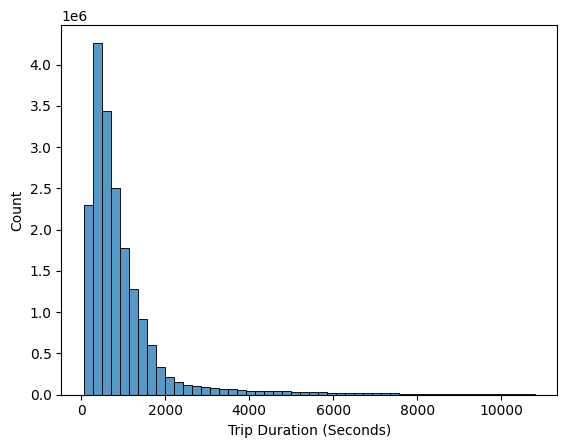

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of trip duration
sns.histplot(df_filtered['Duration'], bins=50)
plt.xlabel('Trip Duration (Seconds)')
plt.ylabel('Count')
plt.show()

In [19]:
# Extract 'time of day', 'day of week', and 'month' from the datetime column
df_filtered['time_of_day'] = df_filtered['Start date'].dt.strftime('%H:%M')
df_filtered['day_of_week'] = df_filtered['Start date'].dt.strftime('%A')
df_filtered['month'] = df_filtered['Start date'].dt.strftime('%B')

# Data analysis by time of day
trips_by_time_of_day = df_filtered.groupby('time_of_day')['Duration'].count()

# Data analysis by day of week
trips_by_day_of_week = df_filtered.groupby('day_of_week')['Duration'].count()
# Fix the index order
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
trips_by_day_of_week = trips_by_day_of_week.reindex(days_of_week)
# Data analysis by month
trips_by_month = df_filtered.groupby('month')['Duration'].count()
# Fix the index order
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
trips_by_month = trips_by_month.reindex(months)


# Display the results
print("Trips by Time of Day:")
print(trips_by_time_of_day)
print("\nTrips by Day of Week:")
print(trips_by_day_of_week)
print("\nTrips by Month:")
print(trips_by_month)

<ipython-input-19-a49bf4929ce8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['time_of_day'] = df_filtered['Start date'].dt.strftime('%H:%M')
<ipython-input-19-a49bf4929ce8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['day_of_week'] = df_filtered['Start date'].dt.strftime('%A')
<ipython-input-19-a49bf4929ce8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

Trips by Time of Day:
time_of_day
00:00    3581
00:01    3848
00:02    3845
00:03    3755
00:04    3672
         ... 
23:55    3891
23:56    3887
23:57    3839
23:58    3870
23:59    3314
Name: Duration, Length: 1440, dtype: int64

Trips by Day of Week:
day_of_week
Monday       2639347
Tuesday      2744282
Wednesday    2809433
Thursday     2780765
Friday       2809339
Saturday     2698159
Sunday       2543920
Name: Duration, dtype: int64

Trips by Month:
month
January       794890
February      860485
March        1261175
April        1729926
May          1868610
June         1982658
July         2051259
August       2070587
September    2006556
October      1917410
November     1424771
December     1056918
Name: Duration, dtype: int64


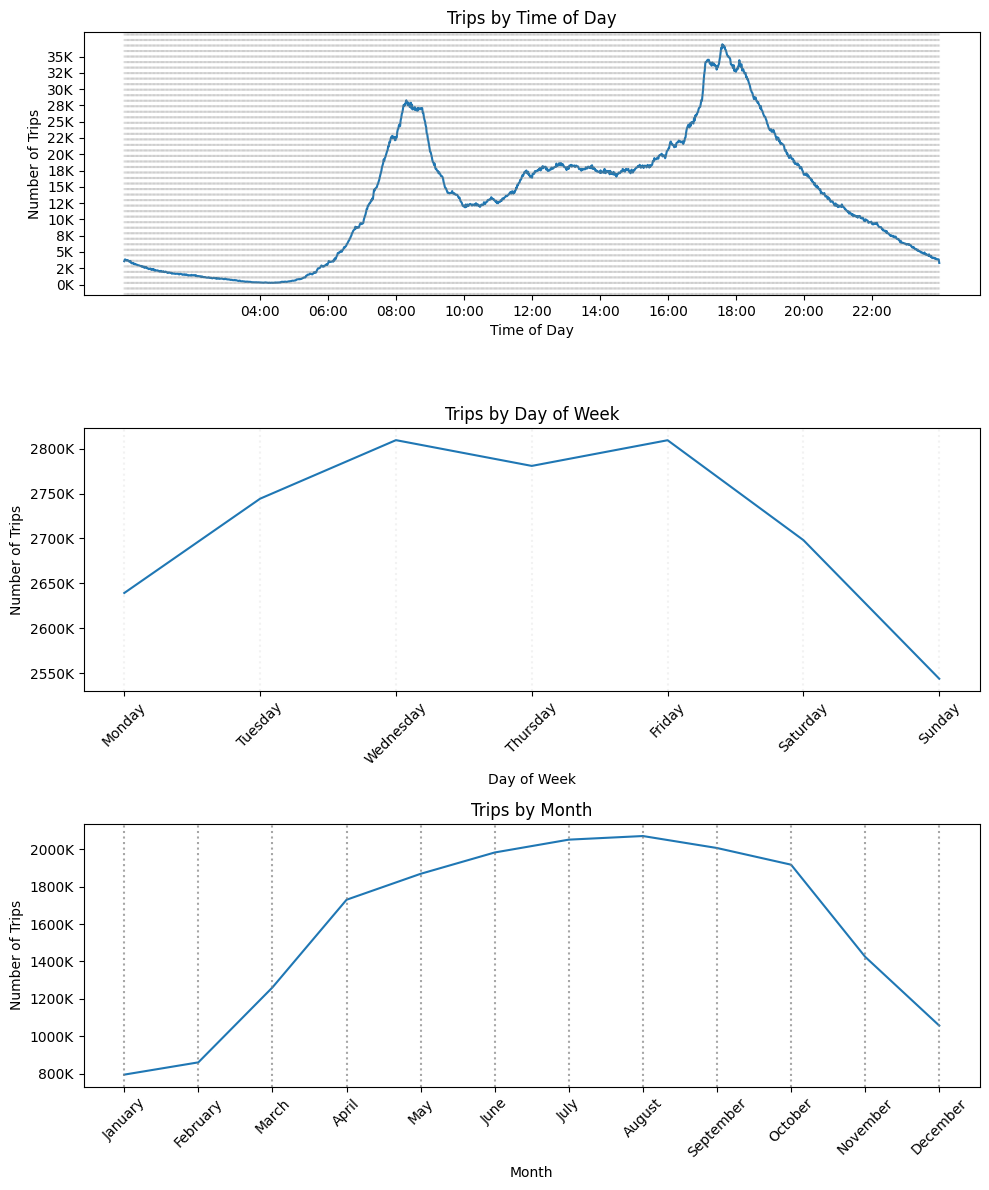

In [36]:
# Plotting the count data as line graphs
plt.figure(figsize=(10, 12))

# Line plot for trips by time of day
plt.subplot(3, 1, 1)
plt.plot(trips_by_time_of_day.index, trips_by_time_of_day)
plt.xlabel('Time of Day')
plt.ylabel('Number of Trips')
plt.title('Trips by Time of Day')
plt.yticks(range(0, max(trips_by_time_of_day)+1, 2500), range(0, max(trips_by_time_of_day)+1, 2500))

# Simplify x-axis ticks for time of day plot
plt.xticks(['04:00','06:00','08:00', '10:00', '12:00', '14:00', '16:00', '18:00','20:00', '22:00'])

# Add vertical dotted lines from each x-axis tick
for xtick in trips_by_time_of_day.index:
    plt.axvline(x=xtick, linestyle='dotted', color='gray', alpha=0.1)


# Format y-axis tick labels in thousands and avoid scientific notation for time of day plot
formatter = FuncFormatter(lambda x, pos: '{:.0f}K'.format(x / 1000))
plt.gca().yaxis.set_major_formatter(formatter)

# Line plot for trips by day of week
plt.subplot(3, 1, 2)
plt.plot(trips_by_day_of_week.index, trips_by_day_of_week)
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips')
plt.title('Trips by Day of Week')
plt.xticks(rotation=45)

# Add vertical dotted lines from each x-axis tick
for xtick in trips_by_day_of_week.index:
    plt.axvline(x=xtick, linestyle='dotted', color='gray', alpha=0.1)

# Format y-axis tick labels in thousands and avoid scientific notation for day of week plot
plt.gca().yaxis.set_major_formatter(formatter)

# Line plot for trips by month
plt.subplot(3, 1, 3)
plt.plot(trips_by_month.index, trips_by_month)
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Trips by Month from 2010-2017')
plt.xticks(rotation=45)

# Add vertical dotted lines from each x-axis tick
for xtick in trips_by_month.index:
    plt.axvline(x=xtick, linestyle='dotted', color='gray', alpha=0.7)

# Format y-axis tick labels in thousands and avoid scientific notation for month plot
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

In [37]:
# Save As a CSV file To Google Drive
data_folder_path = "/content/drive/My Drive/MSCA31009MLPA_FinalProject/data/"

file_name = '/EDA2010-2017.csv'
with open(data_folder_path+file_name, 'w', encoding = 'utf-8-sig') as f:
  df_filtered.to_csv(f)

### 4. Repeat the above process for remaining datasets for year 2018 dataset

In [38]:
# Specify the directory path: 
path = "/content/drive/My Drive/MSCA31009MLPA_FinalProject/data/2018"
!ls "/content/drive/My Drive/MSCA31009MLPA_FinalProject/data/2018"

201801_capitalbikeshare_tripdata.csv  201807-capitalbikeshare-tripdata.csv
201802-capitalbikeshare-tripdata.csv  201808-capitalbikeshare-tripdata.csv
201803-capitalbikeshare-tripdata.csv  201809-capitalbikeshare-tripdata.csv
201804-capitalbikeshare-tripdata.csv  201810-capitalbikeshare-tripdata.csv
201805-capitalbikeshare-tripdata.csv  201811-capitalbikeshare-tripdata.csv
201806-capitalbikeshare-tripdata.csv  201812-capitalbikeshare-tripdata.csv


In [39]:
# Loop through the files:
all_data = pd.DataFrame()  # Create an empty DataFrame to store the concatenated data
for file_name in os.listdir(path):
    if file_name.endswith(".csv"):
        file_path = os.path.join(path, file_name)
        data = pd.read_csv(file_path)
        all_data = pd.concat([all_data, data], ignore_index=True)

In [40]:
# View the concatenated data:
all_data.head

<bound method NDFrame.head of          Duration           Start date             End date  \
0             552  2018-01-01 00:05:06  2018-01-01 00:14:18   
1            1282  2018-01-01 00:14:30  2018-01-01 00:35:53   
2            1265  2018-01-01 00:14:53  2018-01-01 00:35:58   
3             578  2018-01-01 00:15:31  2018-01-01 00:25:09   
4             372  2018-01-01 00:18:02  2018-01-01 00:24:15   
...           ...                  ...                  ...   
3542679      3313  2018-12-31 23:37:22  2019-01-01 00:32:36   
3542680       888  2018-12-31 23:42:18  2018-12-31 23:57:07   
3542681      2332  2018-12-31 23:44:23  2019-01-01 00:23:16   
3542682       307  2018-12-31 23:52:42  2018-12-31 23:57:50   
3542683      1062  2018-12-31 23:54:09  2019-01-01 00:11:52   

         Start station number                  Start station  \
0                       31104    Adams Mill & Columbia Rd NW   
1                       31321  15th St & Constitution Ave NW   
2                    

In [41]:
# Inspect the DataFrame:
df2 = all_data
df2.drop(['Bike number'], axis=1, inplace=True)  # Remove specific columns from the DataFrame
df2.drop(['End date'], axis=1, inplace=True)  # Remove specific columns from the DataFrame
print(df2.info())      # Get information about the DataFrame, including column data types and missing values
print(df2.describe())  # Generate summary statistics of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3542684 entries, 0 to 3542683
Data columns (total 7 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   Duration              int64 
 1   Start date            object
 2   Start station number  int64 
 3   Start station         object
 4   End station number    int64 
 5   End station           object
 6   Member type           object
dtypes: int64(3), object(4)
memory usage: 189.2+ MB
None
        Duration  Start station number  End station number
count 3542684.00            3542684.00          3542684.00
mean     1143.42              31325.01            31325.91
std      2204.50                223.74              221.19
min        60.00              31000.00            31000.00
25%       402.00              31204.00            31211.00
50%       698.00              31258.00            31258.00
75%      1210.00              31505.00            31505.00
max     86372.00              32407.00            324

In [42]:
# Convert Station Number that are unnecessary in integer 
df2['Start station number'] = df2['Start station number'].astype(str)     # Convert column to string type
df2['End station number'] = df2['End station number'].astype(str)         # Convert column to string type
df2['Start date'] = pd.to_datetime(df2['Start date'])                     # Convert column to datetime type
# Handling missing values:
print(df2.shape)                 # Check the shape of DF after dropping na
df2.dropna()                     # Drop rows with any missing values
df2.drop_duplicates(inplace=True)# Drop rows with duplicates
print(df2.shape)                 # Check the shape of DF after dropping na
# We learn that this dataset has no missing data!
# Handle outliers: Given the duration is measured in second, lets set the upper limit as 10,800 second that any trip longer than 3hrs.
df2_filtered = df2[(df2['Duration'] > 59) & (df2['Duration'] < 10800)]  # Filter out rows based on specified thresholds
print(f'The number of dropped outliers is: {len(df2)-len(df2_filtered)}')
print(df2_filtered.shape) 

(3542684, 7)
(3523752, 7)
The number of dropped outliers is: 17138
(3506614, 7)


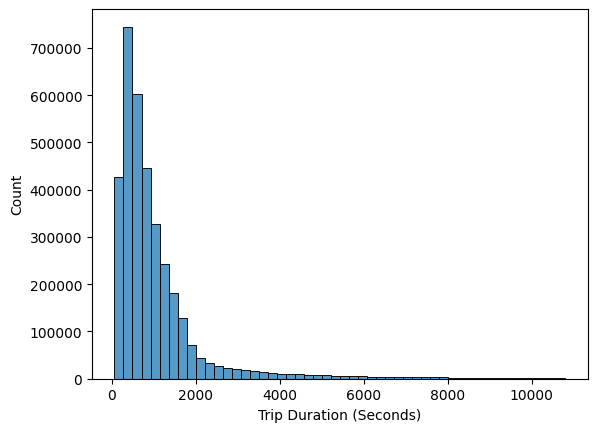

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of trip duration
sns.histplot(df2_filtered['Duration'], bins=50)
plt.xlabel('Trip Duration (Seconds)')
plt.ylabel('Count')
plt.show()

In [45]:
# Extract 'time of day', 'day of week', and 'month' from the datetime column
df2_filtered['time_of_day'] = df2_filtered['Start date'].dt.strftime('%H:%M:')
df2_filtered['day_of_week'] = df2_filtered['Start date'].dt.strftime('%A')
df2_filtered['month'] = df2_filtered['Start date'].dt.strftime('%B')

# Data analysis by time of day
trips_by_time_of_day2 = df2_filtered.groupby('time_of_day')['Duration'].count()

# Data analysis by day of week
trips_by_day_of_week2 = df2_filtered.groupby('day_of_week')['Duration'].count()
# Fix the index order
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
trips_by_day_of_week2 = trips_by_day_of_week2.reindex(days_of_week)
# Data analysis by month
trips_by_month2 = df2_filtered.groupby('month')['Duration'].count()
# Fix the index order
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
trips_by_month2 = trips_by_month2.reindex(months)


# Display the results
print("Trips by Time of Day:")
print(trips_by_time_of_day2)
print("\nTrips by Day of Week:")
print(trips_by_day_of_week2)
print("\nTrips by Month:")
print(trips_by_month2)

<ipython-input-45-c2821f13bc87>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_filtered['time_of_day'] = df2_filtered['Start date'].dt.strftime('%H:%M:')
<ipython-input-45-c2821f13bc87>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2_filtered['day_of_week'] = df2_filtered['Start date'].dt.strftime('%A')
<ipython-input-45-c2821f13bc87>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

Trips by Time of Day:
time_of_day
00:00:    570
00:01:    596
00:02:    613
00:03:    551
00:04:    559
         ... 
23:55:    630
23:56:    664
23:57:    599
23:58:    643
23:59:    631
Name: Duration, Length: 1440, dtype: int64

Trips by Day of Week:
day_of_week
Monday       484917
Tuesday      507683
Wednesday    532501
Thursday     534187
Friday       523779
Saturday     495211
Sunday       428336
Name: Duration, dtype: int64

Trips by Month:
month
January      168231
February     181983
March        238014
April        327205
May          371760
June         389947
July         401920
August       401546
September    324165
October      341620
November     201728
December     158495
Name: Duration, dtype: int64


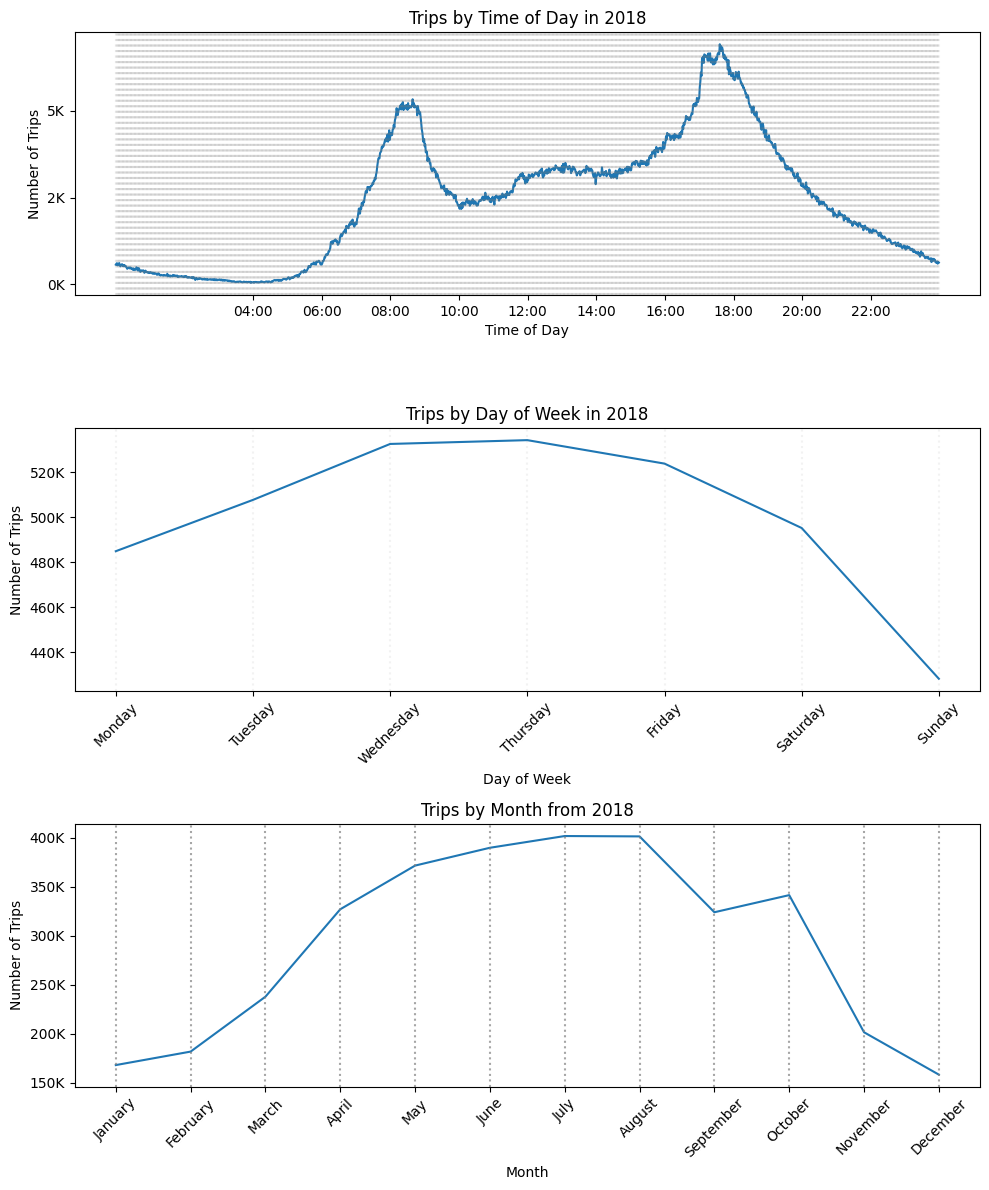

In [53]:
# Plotting the count data as line graphs
plt.figure(figsize=(10, 12))

# Line plot for trips by time of day
plt.subplot(3, 1, 1)
plt.plot(trips_by_time_of_day.index, trips_by_time_of_day2)
plt.xlabel('Time of Day')
plt.ylabel('Number of Trips')
plt.title('Trips by Time of Day in 2018')
plt.yticks(range(0, max(trips_by_time_of_day2)+1, 2500), range(0, max(trips_by_time_of_day2)+1, 2500))

# Simplify x-axis ticks for time of day plot
plt.xticks(['04:00','06:00','08:00', '10:00', '12:00', '14:00', '16:00', '18:00','20:00', '22:00'])

# Add vertical dotted lines from each x-axis tick
for xtick in trips_by_time_of_day.index:
    plt.axvline(x=xtick, linestyle='dotted', color='gray', alpha=0.1)


# Format y-axis tick labels in thousands and avoid scientific notation for time of day plot
formatter = FuncFormatter(lambda x, pos: '{:.0f}K'.format(x / 1000))
plt.gca().yaxis.set_major_formatter(formatter)

# Line plot for trips by day of week
plt.subplot(3, 1, 2)
plt.plot(trips_by_day_of_week.index, trips_by_day_of_week2)
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips')
plt.title('Trips by Day of Week in 2018')
plt.xticks(rotation=45)

# Add vertical dotted lines from each x-axis tick
for xtick in trips_by_day_of_week.index:
    plt.axvline(x=xtick, linestyle='dotted', color='gray', alpha=0.1)

# Format y-axis tick labels in thousands and avoid scientific notation for day of week plot
plt.gca().yaxis.set_major_formatter(formatter)

# Line plot for trips by month
plt.subplot(3, 1, 3)
plt.plot(trips_by_month.index, trips_by_month2)
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Trips by Month from 2018')
plt.xticks(rotation=45)

# Add vertical dotted lines from each x-axis tick
for xtick in trips_by_month.index:
    plt.axvline(x=xtick, linestyle='dotted', color='gray', alpha=0.7)

# Format y-axis tick labels in thousands and avoid scientific notation for month plot
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

In [52]:
# Save As a CSV file To Google Drive
data_folder_path = "/content/drive/My Drive/MSCA31009MLPA_FinalProject/data/"

file_name = '/EDA2018.csv'
with open(data_folder_path+file_name, 'w', encoding = 'utf-8-sig') as f:
  df2_filtered.to_csv(f)

### 5. Year 2019

In [2]:
# Specify the directory path: 
path = "/content/drive/My Drive/MSCA31009MLPA_FinalProject/data/2019"
!ls "/content/drive/My Drive/MSCA31009MLPA_FinalProject/data/2019"

ls: cannot access '/content/drive/My Drive/MSCA31009MLPA_FinalProject/data/2019': No such file or directory


In [4]:
# Loop through the files:
all_data = pd.DataFrame()  # Create an empty DataFrame to store the concatenated data
for file_name in os.listdir(path):
    if file_name.endswith(".csv"):
        file_path = os.path.join(path, file_name)
        data = pd.read_csv(file_path)
        all_data = pd.concat([all_data, data], ignore_index=True)

In [5]:
# Inspect the DataFrame:
df3 = all_data
df3.drop(['Bike number'], axis=1, inplace=True)  # Remove specific columns from the DataFrame
df3.drop(['End date'], axis=1, inplace=True)  # Remove specific columns from the DataFrame
print(df3.info())      # Get information about the DataFrame, including column data types and missing values
print(df3.describe())  # Generate summary statistics of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3398417 entries, 0 to 3398416
Data columns (total 7 columns):
 #   Column                Dtype 
---  ------                ----- 
 0   Duration              int64 
 1   Start date            object
 2   Start station number  int64 
 3   Start station         object
 4   End station number    int64 
 5   End station           object
 6   Member type           object
dtypes: int64(3), object(4)
memory usage: 181.5+ MB
None
        Duration  Start station number  End station number
count 3398417.00            3398417.00          3398417.00
mean     1069.70              31337.44            31337.99
std      2205.49                448.85              443.97
min        60.00                  0.00                0.00
25%       396.00              31204.00            31212.00
50%       680.00              31265.00            31264.00
75%      1152.00              31524.00            31524.00
max     86365.00              32609.00            326

In [6]:
# Convert Station Number that are unnecessary in integer 
df3['Start station number'] = df3['Start station number'].astype(str)     # Convert column to string type
df3['End station number'] = df3['End station number'].astype(str)         # Convert column to string type
df3['Start date'] = pd.to_datetime(df3['Start date'])                     # Convert column to datetime type
# Handling missing values:
print(df3.shape)                 # Check the shape of DF after dropping na
df3.dropna()                     # Drop rows with any missing values
df3.drop_duplicates(inplace=True)# Drop rows with duplicates
print(df3.shape)                 # Check the shape of DF after dropping na
# We learn that this dataset has no missing data!
# Handle outliers: Given the duration is measured in second, lets set the upper limit as 10,800 second that any trip longer than 3hrs.
df3_filtered = df3[(df3['Duration'] > 59) & (df3['Duration'] < 10800)]  # Filter out rows based on specified thresholds
print(f'The number of dropped outliers is: {len(df3)-len(df3_filtered)}')
print(df3_filtered.shape) 

(3397976, 7)
The number of dropped outliers is: 14545
(3383431, 7)


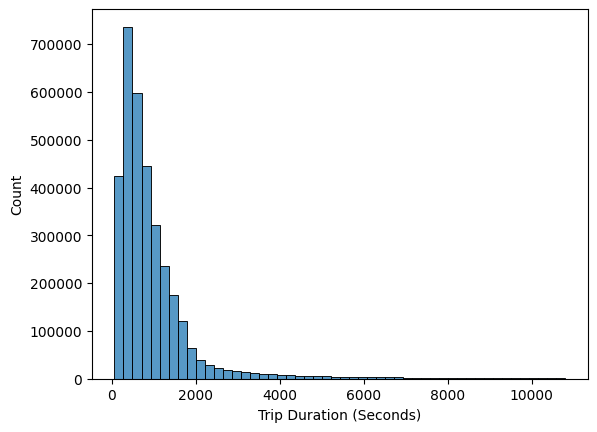

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of trip duration
sns.histplot(df3_filtered['Duration'], bins=50)
plt.xlabel('Trip Duration (Seconds)')
plt.ylabel('Count')
plt.show()

In [42]:
df3_filtered.columns

Index(['Duration', 'Start date', 'Start station number', 'Start station',
       'End station number', 'End station', 'Member type', 'time_of_day',
       'day_of_week', 'month'],
      dtype='object')

In [17]:
# Extract 'time of day', 'day of week', and 'month' from the datetime column
df3_filtered['time_of_day'] = df3_filtered['Start date'].dt.strftime('%H:%M:')
df3_filtered['day_of_week'] = df3_filtered['Start date'].dt.strftime('%A')
df3_filtered['month'] = df3_filtered['Start date'].dt.strftime('%B')

# Data analysis by time of day
trips_by_time_of_day3 = df3_filtered.groupby('time_of_day')['Duration'].count()

# Data analysis by day of week
trips_by_day_of_week3 = df3_filtered.groupby('day_of_week')['Duration'].count()
# Fix the index order
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
trips_by_day_of_week3 = trips_by_day_of_week3.reindex(days_of_week)
# Data analysis by month
trips_by_month3 = df3_filtered.groupby('month')['Duration'].count()
# Fix the index order
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
trips_by_month3 = trips_by_month3.reindex(months)


# Display the results
print("Trips by Time of Day:")
print(trips_by_time_of_day3)
print("\nTrips by Day of Week:")
print(trips_by_day_of_week3)
print("\nTrips by Month:")
print(trips_by_month3)

<ipython-input-17-b3f4b0d61979>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_filtered['time_of_day'] = df3_filtered['Start date'].dt.strftime('%H:%M:')
<ipython-input-17-b3f4b0d61979>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3_filtered['day_of_week'] = df3_filtered['Start date'].dt.strftime('%A')
<ipython-input-17-b3f4b0d61979>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

Trips by Time of Day:
time_of_day
00:00:    622
00:01:    594
00:02:    636
00:03:    618
00:04:    613
         ... 
23:55:    607
23:56:    622
23:57:    615
23:58:    663
23:59:    608
Name: Duration, Length: 1440, dtype: int64

Trips by Day of Week:
day_of_week
Monday       463508
Tuesday      508454
Wednesday    511819
Thursday     501361
Friday       508572
Saturday     492455
Sunday       397262
Name: Duration, dtype: int64

Trips by Month:
month
January      150247
February     157532
March        252439
April        345883
May          336032
June         348289
July         354810
August       358508
September    358904
October      336304
November     222964
December     161519
Name: Duration, dtype: int64


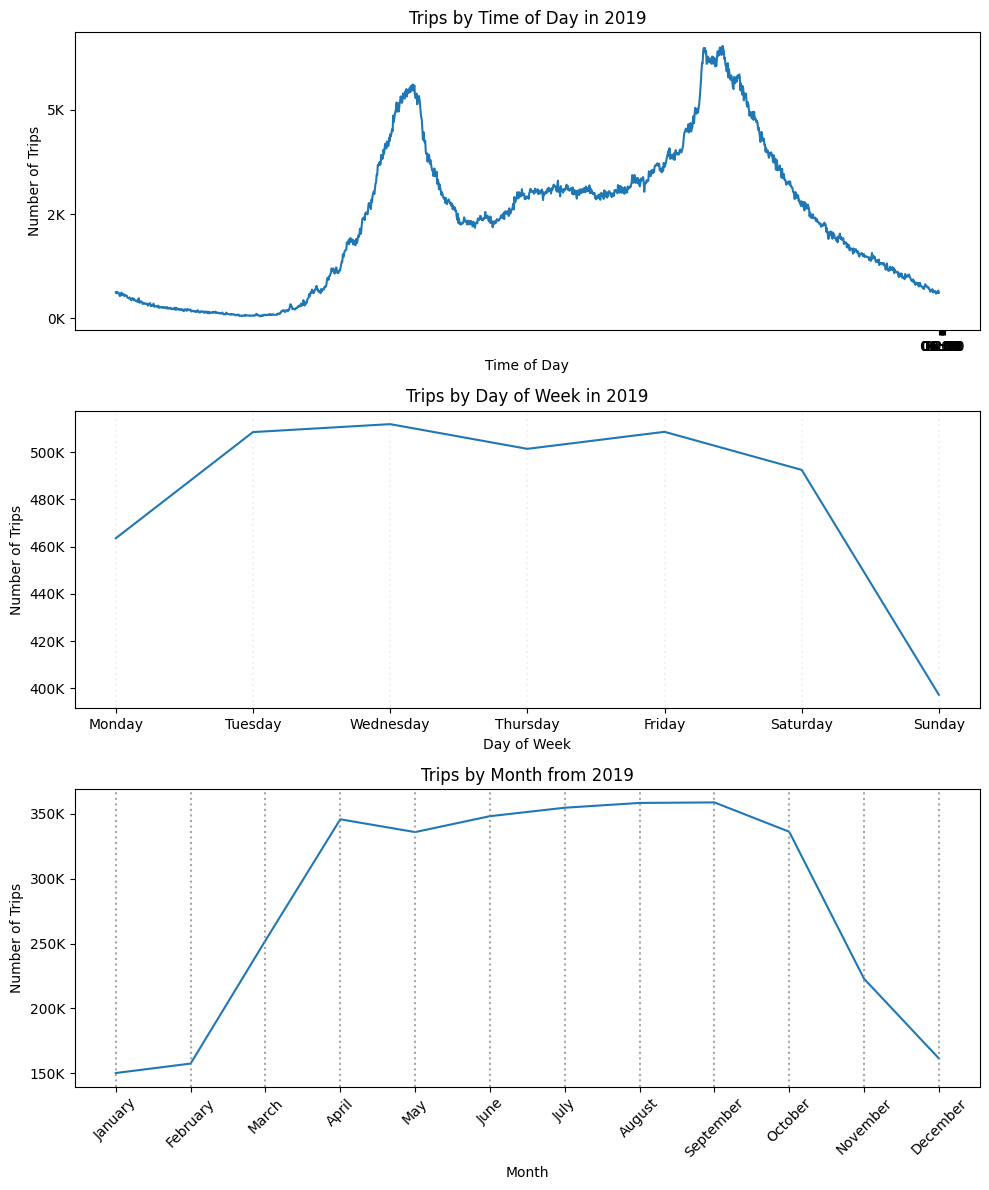

In [20]:
# Plotting the count data as line graphs
plt.figure(figsize=(10, 12))

# Line plot for trips by time of day
plt.subplot(3, 1, 1)
plt.plot(trips_by_time_of_day3.index, trips_by_time_of_day3)
plt.xlabel('Time of Day')
plt.ylabel('Number of Trips')
plt.title('Trips by Time of Day in 2019')
plt.yticks(range(0, max(trips_by_time_of_day3)+1, 2500), range(0, max(trips_by_time_of_day3)+1, 2500))
# Simplify x-axis ticks for time of day plot
plt.xticks(['04:00','06:00','08:00', '10:00', '12:00', '14:00', '16:00', '18:00','20:00', '22:00'])

# # Add vertical dotted lines from each x-axis tick
# for xtick in trips_by_time_of_day.index:
#     plt.axvline(x=xtick, linestyle='dotted', color='gray', alpha=0.1)


# Format y-axis tick labels in thousands and avoid scientific notation for time of day plot
formatter = FuncFormatter(lambda x, pos: '{:.0f}K'.format(x / 1000))
plt.gca().yaxis.set_major_formatter(formatter)

# Line plot for trips by day of week
plt.subplot(3, 1, 2)
plt.plot(trips_by_day_of_week3.index, trips_by_day_of_week3)
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips')
plt.title('Trips by Day of Week in 2019')


# Add vertical dotted lines from each x-axis tick
for xtick in trips_by_day_of_week3.index:
    plt.axvline(x=xtick, linestyle='dotted', color='gray', alpha=0.1)

# Format y-axis tick labels in thousands and avoid scientific notation for day of week plot
plt.gca().yaxis.set_major_formatter(formatter)

# Line plot for trips by month
plt.subplot(3, 1, 3)
plt.plot(trips_by_month3.index, trips_by_month3)
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Trips by Month from 2019')
plt.xticks(rotation=45)

# Add vertical dotted lines from each x-axis tick
for xtick in trips_by_month3.index:
    plt.axvline(x=xtick, linestyle='dotted', color='gray', alpha=0.7)

# Format y-axis tick labels in thousands and avoid scientific notation for month plot
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

In [21]:
# Save As a CSV file To Google Drive
data_folder_path = "/content/drive/My Drive/MSCA31009MLPA_FinalProject/data/"

file_name = '/EDA2019.csv'
with open(data_folder_path+file_name, 'w', encoding = 'utf-8-sig') as f:
  df3_filtered.to_csv(f)

### Year 2020

In [84]:
# Specify the directory path: 
path = "/content/drive/My Drive/MSCA31009MLPA_FinalProject/data/2020"
!ls "/content/drive/My Drive/MSCA31009MLPA_FinalProject/data/2020"

202001-capitalbikeshare-tripdata.csv  202007-capitalbikeshare-tripdata.csv
202002-capitalbikeshare-tripdata.csv  202008-capitalbikeshare-tripdata.csv
202003-capitalbikeshare-tripdata.csv  202009-capitalbikeshare-tripdata.csv
202004-capitalbikeshare-tripdata.csv  202010-capitalbikeshare-tripdata.csv
202005-capitalbikeshare-tripdata.csv  202011-capitalbikeshare-tripdata.csv
202006-capitalbikeshare-tripdata.csv  202012-capitalbikeshare-tripdata.csv


In [85]:
# Loop through the files:
all_data = pd.DataFrame()  # Create an empty DataFrame to store the concatenated data
for file_name in os.listdir(path):
    if file_name.endswith(".csv"):
        file_path = os.path.join(path, file_name)
        data = pd.read_csv(file_path)
        all_data = pd.concat([all_data, data], ignore_index=True)

all_data.columns

Index(['Duration', 'Start date', 'End date', 'Start station number',
       'Start station', 'End station number', 'End station', 'Bike number',
       'Member type', 'ride_id', 'rideable_type', 'started_at', 'ended_at',
       'start_station_name', 'start_station_id', 'end_station_name',
       'end_station_id', 'start_lat', 'start_lng', 'end_lat', 'end_lng',
       'member_casual'],
      dtype='object')

In [87]:
# Inspect the DataFrame:
df4 = all_data[['Duration','Start date','Start station number','Start station',
           'End station number','End station', 'Member type']]

print(df4.info())      # Get information about the DataFrame, including column data types and missing values
print(df4.describe())  # Generate summary statistics of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2216914 entries, 0 to 2216913
Data columns (total 7 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Duration              float64
 1   Start date            object 
 2   Start station number  float64
 3   Start station         object 
 4   End station number    float64
 5   End station           object 
 6   Member type           object 
dtypes: float64(3), object(4)
memory usage: 118.4+ MB
None
       Duration  Start station number  End station number
count 537400.00             537400.00           537400.00
mean     917.59              31330.77            31330.16
std     1902.09                753.58              794.28
min       60.00                  0.00                0.00
25%      367.00              31202.00            31211.00
50%      615.00              31267.00            31266.00
75%     1026.00              31602.00            31602.00
max    86202.00              32609.00            3

In [90]:
# Inspect the DataFrame:
df4.head()

,Duration,Start date,Start station number,Start station,End station number,End station,Member type
0,506.00,2020-01-01 00:00:59,31623.0,Columbus Circle / Union Station,31658.0,Rosedale Rec Center,Member
1,1050.00,2020-01-01 00:01:16,31613.0,Eastern Market Metro / Pennsylvania Ave & 7th ...,31606.0,Potomac & Pennsylvania Ave SE,Member
2,1687.00,2020-01-01 00:02:42,31218.0,L'Enfant Plaza / 7th & C St SW,31271.0,Constitution Ave & 2nd St NW/DOL,Member
3,182.00,2020-01-01 00:02:44,31627.0,3rd & M St NE,31508.0,Gallaudet / 8th St & Florida Ave NE,Member
4,1002.00,2020-01-01 00:06:12,31247.0,Jefferson Dr & 14th St SW,31274.0,10th & G St NW,Member


In [93]:
# Convert Station Number that are unnecessary in integer 
df4['Start station number'] = df4['Start station number'].astype(str)     # Convert column to string type
df4['End station number']   = df4['End station number'].astype(str)       # Convert column to string type
df4['Start date']           = pd.to_datetime(df4['Start date'])           # Convert column to datetime type
# Handling missing values:
print(df4.shape)                 # Check the shape of DF after dropping na
df4.dropna()                     # Drop rows with any missing values
df4.drop_duplicates(inplace=True)# Drop rows with duplicates
print(df4.shape)                 # Check the shape of DF after dropping na
# We learn that this dataset has no missing data!
# Handle outliers: Given the duration is measured in second, lets set the upper limit as 7200 second that any trip longer than 3hrs.
df4_filtered = df4[(df4['Duration'] > 59) & (df4['Duration'] < 7200)]  # Filter out rows based on specified thresholds
print(f'The number of dropped outliers is: {len(df4)-len(df4_filtered)}')
print(df4_filtered.shape) 

<ipython-input-93-58181fee85c8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['Start station number'] = df4['Start station number'].astype(str)     # Convert column to string type
<ipython-input-93-58181fee85c8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4['End station number']   = df4['End station number'].astype(str)       # Convert column to string type
<ipython-input-93-58181fee85c8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .

(537357, 7)
(537357, 7)
The number of dropped outliers is: 3177
(534180, 7)


<ipython-input-93-58181fee85c8>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4.drop_duplicates(inplace=True)# Drop rows with duplicates


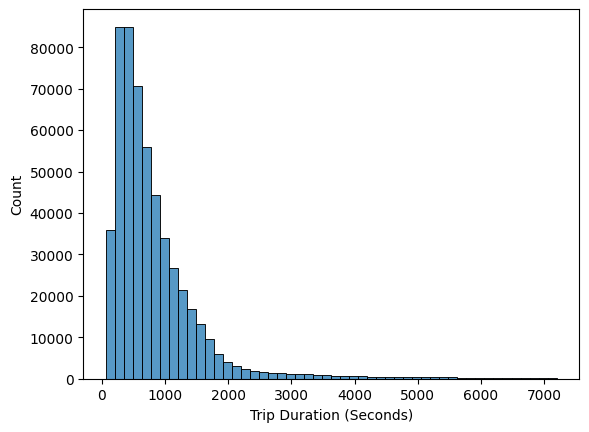

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of trip duration
sns.histplot(df4_filtered['Duration'], bins=50)
plt.xlabel('Trip Duration (Seconds)')
plt.ylabel('Count')
plt.show()

In [95]:
# Extract 'time of day', 'day of week', and 'month' from the datetime column
df4_filtered['time_of_day'] = df4_filtered['Start date'].dt.strftime('%H:%M:')
df4_filtered['day_of_week'] = df4_filtered['Start date'].dt.strftime('%A')
df4_filtered['month']       = df4_filtered['Start date'].dt.strftime('%B')

# Data analysis by time of day
trips_by_time_of_day4 = df4_filtered.groupby('time_of_day')['Duration'].count()

# Data analysis by day of week
trips_by_day_of_week4 = df4_filtered.groupby('day_of_week')['Duration'].count()
# Fix the index order
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
trips_by_day_of_week4 = trips_by_day_of_week4.reindex(days_of_week)
# Data analysis by month
trips_by_month4 = df4_filtered.groupby('month')['Duration'].count()
# Fix the index order
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
trips_by_month4 = trips_by_month4.reindex(months)

# Display the results
print("Trips by Time of Day:")
print(trips_by_time_of_day4)
print("\nTrips by Day of Week:")
print(trips_by_day_of_week4)
print("\nTrips by Month:")
print(trips_by_month4)

<ipython-input-95-dee449d21c1a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_filtered['time_of_day'] = df4_filtered['Start date'].dt.strftime('%H:%M:')
<ipython-input-95-dee449d21c1a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_filtered['day_of_week'] = df4_filtered['Start date'].dt.strftime('%A')


Trips by Time of Day:
time_of_day
00:00:    65
00:01:    70
00:02:    66
00:03:    66
00:04:    53
          ..
23:55:    61
23:56:    64
23:57:    64
23:58:    54
23:59:    47
Name: Duration, Length: 1440, dtype: int64

Trips by Day of Week:
day_of_week
Monday       77045
Tuesday      77062
Wednesday    85455
Thursday     81977
Friday       79290
Saturday     64667
Sunday       68684
Name: Duration, dtype: int64

Trips by Month:
month
January     196132.00
February    177117.00
March       160931.00
April             NaN
May               NaN
June              NaN
July              NaN
August            NaN
September         NaN
October           NaN
November          NaN
December          NaN
Name: Duration, dtype: float64


<ipython-input-95-dee449d21c1a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df4_filtered['month']       = df4_filtered['Start date'].dt.strftime('%B')


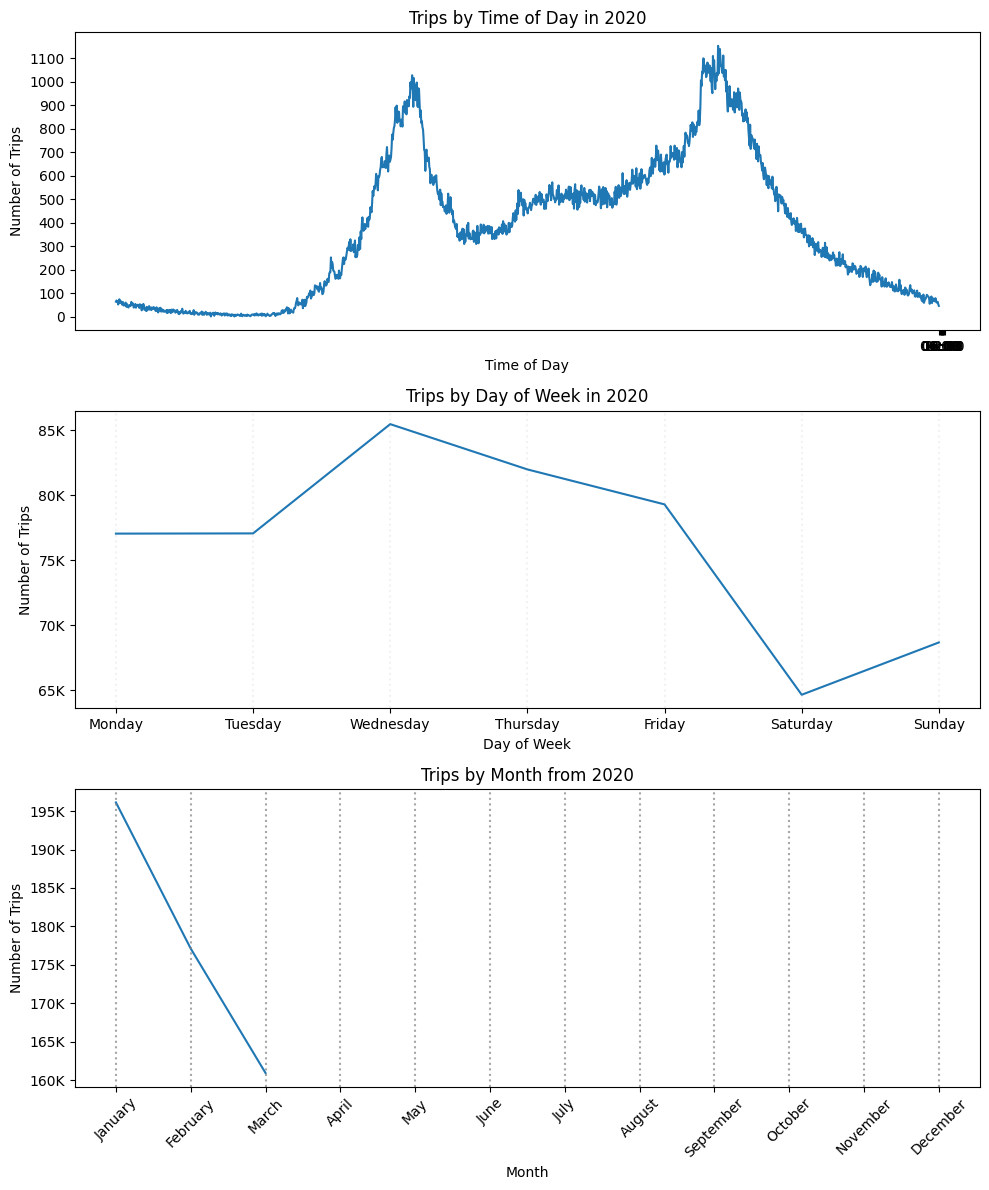

In [99]:
# Plotting the count data as line graphs
plt.figure(figsize=(10, 12))

# Line plot for trips by time of day
plt.subplot(3, 1, 1)
plt.plot(trips_by_time_of_day4.index, trips_by_time_of_day4)
plt.xlabel('Time of Day')
plt.ylabel('Number of Trips')
plt.title('Trips by Time of Day in 2020')
plt.yticks(range(0, max(trips_by_time_of_day4)+1,100), range(0, max(trips_by_time_of_day4)+1, 100))
# Simplify x-axis ticks for time of day plot
plt.xticks(['04:00','06:00','08:00', '10:00', '12:00', '14:00', '16:00', '18:00','20:00', '22:00'])

# # Add vertical dotted lines from each x-axis tick
# for xtick in trips_by_time_of_day.index:
#     plt.axvline(x=xtick, linestyle='dotted', color='gray', alpha=0.1)


# Format y-axis tick labels in thousands and avoid scientific notation for time of day plot
# formatter = FuncFormatter(lambda x, pos: '{:.0f}K'.format(x / 1000))
# plt.gca().yaxis.set_major_formatter(formatter)

# Line plot for trips by day of week
plt.subplot(3, 1, 2)
plt.plot(trips_by_day_of_week4.index, trips_by_day_of_week4)
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips')
plt.title('Trips by Day of Week in 2020')


# Add vertical dotted lines from each x-axis tick
for xtick in trips_by_day_of_week4.index:
    plt.axvline(x=xtick, linestyle='dotted', color='gray', alpha=0.1)

# Format y-axis tick labels in thousands and avoid scientific notation for day of week plot
plt.gca().yaxis.set_major_formatter(formatter)

# Line plot for trips by month
plt.subplot(3, 1, 3)
plt.plot(trips_by_month4.index, trips_by_month4)
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Trips by Month from 2020')
plt.xticks(rotation=45)

# Add vertical dotted lines from each x-axis tick
for xtick in trips_by_month4.index:
    plt.axvline(x=xtick, linestyle='dotted', color='gray', alpha=0.7)

# Format y-axis tick labels in thousands and avoid scientific notation for month plot
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

In [100]:
# Save As a CSV file To Google Drive
data_folder_path = "/content/drive/My Drive/MSCA31009MLPA_FinalProject/data/"

file_name = '/EDA2020.csv'
with open(data_folder_path+file_name, 'w', encoding = 'utf-8-sig') as f:
  df4_filtered.to_csv(f)

### Year 2021

In [101]:
# Specify the directory path: 
path = "/content/drive/My Drive/MSCA31009MLPA_FinalProject/data/2021"
!ls "/content/drive/My Drive/MSCA31009MLPA_FinalProject/data/2021"

202101-capitalbikeshare-tripdata.csv  202107-capitalbikeshare-tripdata.csv
202102-capitalbikeshare-tripdata.csv  202108-capitalbikeshare-tripdata.csv
202103-capitalbikeshare-tripdata.csv  202109-capitalbikeshare-tripdata.csv
202104-capitalbikeshare-tripdata.csv  202110-capitalbikeshare-tripdata.csv
202105-capitalbikeshare-tripdata.csv  202111-capitalbikeshare-tripdata.csv
202106-capitalbikeshare-tripdata.csv  202112-capitalbikeshare-tripdata.csv


In [102]:
# Loop through the files:
all_data = pd.DataFrame()  # Create an empty DataFrame to store the concatenated data
for file_name in os.listdir(path):
    if file_name.endswith(".csv"):
        file_path = os.path.join(path, file_name)
        data = pd.read_csv(file_path)
        all_data = pd.concat([all_data, data], ignore_index=True)

<ipython-input-102-24f9868d480f>:6: DtypeWarning: Columns (5,7) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [103]:
all_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,13A48BD20CC3DD85,classic_bike,2021-01-08 17:58:48,2021-01-08 18:25:23,Connecticut Ave & Yuma St NW,31318.00,Georgia Ave & Emerson St NW,31405.00,38.95,-77.07,38.95,-77.03,casual
1,CA68C580B32EEE66,electric_bike,2021-01-08 22:05:51,2021-01-08 22:23:52,8th & D St NW,31270.00,14th & D St SE,31663.00,38.89,-77.02,38.88,-76.99,member
2,5A925307814D5C2B,classic_bike,2021-01-21 17:20:31,2021-01-21 17:23:24,Wilson Blvd. & N. Vermont St.,31926.00,George Mason Dr & Wilson Blvd,31036.00,38.88,-77.11,38.88,-77.12,member
3,B6B2DB54A2B233EE,classic_bike,2021-01-28 10:06:30,2021-01-28 10:20:54,Franklin St & S Washington St,31907.00,Braddock Rd Metro,31047.00,38.80,-77.05,38.81,-77.05,member
4,921A142D5C8A9759,classic_bike,2021-01-11 12:09:45,2021-01-11 12:20:15,St. Asaph & Montgomery St,31931.00,Braddock Rd Metro,31047.00,38.81,-77.04,38.81,-77.05,casual


In [104]:
# Inspect the DataFrame:
df5 = all_data[['started_at', 'ended_at','start_station_id','start_station_name','end_station_id', 'end_station_name','member_casual']]

# Rename the columns
df5 = df5.rename(columns={
    'started_at': 'Start date',
    'ended_at': 'End date',
    'start_station_id': 'Start station number',
    'start_station_name': 'Start station',
    'end_station_id': 'End station number',
    'end_station_name': 'End station',
    'member_casual': 'Member type'
})

# Convert Station Number that are unnecessary in integer 
df5['Start date'] = pd.to_datetime(df5['Start date'])                     # Convert column to datetime type
df5['End date'] = pd.to_datetime(df5['End date'])                         # Convert column to datetime type

# Calculate the duration in seconds by subtracting 'End date' from 'Start date' and converting to seconds
df5['Duration'] = (df5['End date'] - df5['Start date']).dt.total_seconds()
df5 = df5[['Duration','Start date','Start station number','Start station',
           'End station number','End station', 'Member type']]
print(df5.info())      # Get information about the DataFrame, including column data types and missing values
print(df5.describe())  # Generate summary statistics of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2749881 entries, 0 to 2749880
Data columns (total 7 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Duration              float64       
 1   Start date            datetime64[ns]
 2   Start station number  object        
 3   Start station         object        
 4   End station number    object        
 5   End station           object        
 6   Member type           object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 146.9+ MB
None
        Duration
count 2749881.00
mean     1502.86
std     13400.29
min     -5287.00
25%       429.00
50%       751.00
75%      1311.00
max   3272428.00


In [105]:
# Handling missing values:
print(df5.shape)                 # Check the shape of DF after dropping na
df5.dropna()                     # Drop rows with any missing values
df5.drop_duplicates(inplace=True)# Drop rows with duplicates
print(df5.shape)                 # Check the shape of DF after dropping na
# We learn that this dataset has no missing data!
# Handle outliers: Given the duration is measured in second, lets set the upper limit as 7200 second that any trip longer than 3hrs.
df5_filtered = df5[(df5['Duration'] > 59) & (df5['Duration'] < 7200)]  # Filter out rows based on specified thresholds
print(f'The number of dropped outliers is: {len(df5)-len(df5_filtered)}')
print(df5_filtered.shape) 

(2749881, 7)
(2749599, 7)
The number of dropped outliers is: 79738
(2669861, 7)


In [107]:
# Replace the column values
df5_filtered['Member type'] = df5_filtered['Member type'].replace({'member': 'Member', 'casual': 'Casual'})

df5_filtered.head()

<ipython-input-107-3d70974c1fa9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5_filtered['Member type'] = df5_filtered['Member type'].replace({'member': 'Member', 'casual': 'Casual'})


,Duration,Start date,Start station number,Start station,End station number,End station,Member type
0,1595.00,2021-01-08 17:58:48,31318.00,Connecticut Ave & Yuma St NW,31405.00,Georgia Ave & Emerson St NW,Casual
1,1081.00,2021-01-08 22:05:51,31270.00,8th & D St NW,31663.00,14th & D St SE,Member
2,173.00,2021-01-21 17:20:31,31926.00,Wilson Blvd. & N. Vermont St.,31036.00,George Mason Dr & Wilson Blvd,Member
3,864.00,2021-01-28 10:06:30,31907.00,Franklin St & S Washington St,31047.00,Braddock Rd Metro,Member
4,630.00,2021-01-11 12:09:45,31931.00,St. Asaph & Montgomery St,31047.00,Braddock Rd Metro,Casual


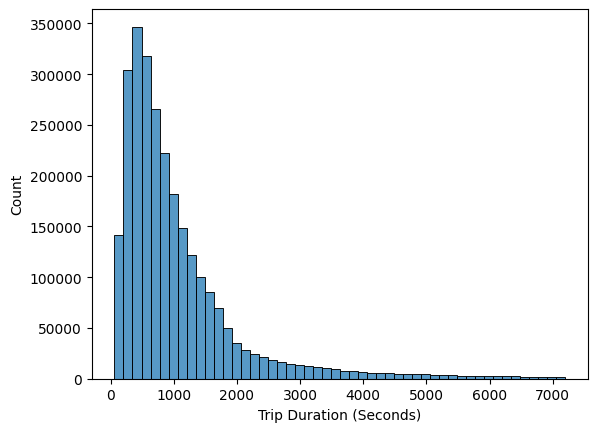

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of trip duration
sns.histplot(df5_filtered['Duration'], bins=50)
plt.xlabel('Trip Duration (Seconds)')
plt.ylabel('Count')
plt.show()

In [109]:
# Extract 'time of day', 'day of week', and 'month' from the datetime column
df5_filtered['time_of_day'] = df5_filtered['Start date'].dt.strftime('%H:%M:')
df5_filtered['day_of_week'] = df5_filtered['Start date'].dt.strftime('%A')
df5_filtered['month']       = df5_filtered['Start date'].dt.strftime('%B')

# Data analysis by time of day
trips_by_time_of_day5 = df5_filtered.groupby('time_of_day')['Duration'].count()

# Data analysis by day of week
trips_by_day_of_week5 = df5_filtered.groupby('day_of_week')['Duration'].count()
# Fix the index order
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
trips_by_day_of_week5 = trips_by_day_of_week4.reindex(days_of_week)
# Data analysis by month
trips_by_month5 = df5_filtered.groupby('month')['Duration'].count()
# Fix the index order
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
trips_by_month5 = trips_by_month5.reindex(months)

# Display the results
print("Trips by Time of Day:")
print(trips_by_time_of_day5)
print("\nTrips by Day of Week:")
print(trips_by_day_of_week5)
print("\nTrips by Month:")
print(trips_by_month5)

<ipython-input-109-6722084a6391>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5_filtered['time_of_day'] = df5_filtered['Start date'].dt.strftime('%H:%M:')
<ipython-input-109-6722084a6391>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df5_filtered['day_of_week'] = df5_filtered['Start date'].dt.strftime('%A')
<ipython-input-109-6722084a6391>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the c

Trips by Time of Day:
time_of_day
00:00:    650
00:01:    669
00:02:    669
00:03:    696
00:04:    674
         ... 
23:55:    687
23:56:    712
23:57:    674
23:58:    695
23:59:    710
Name: Duration, Length: 1440, dtype: int64

Trips by Day of Week:
day_of_week
Monday       77045
Tuesday      77062
Wednesday    85455
Thursday     81977
Friday       79290
Saturday     64667
Sunday       68684
Name: Duration, dtype: int64

Trips by Month:
month
January       96982
February      75811
March        165708
April        208759
May          245982
June         266891
July         302204
August       265080
September    301283
October      318461
November     236082
December     186618
Name: Duration, dtype: int64


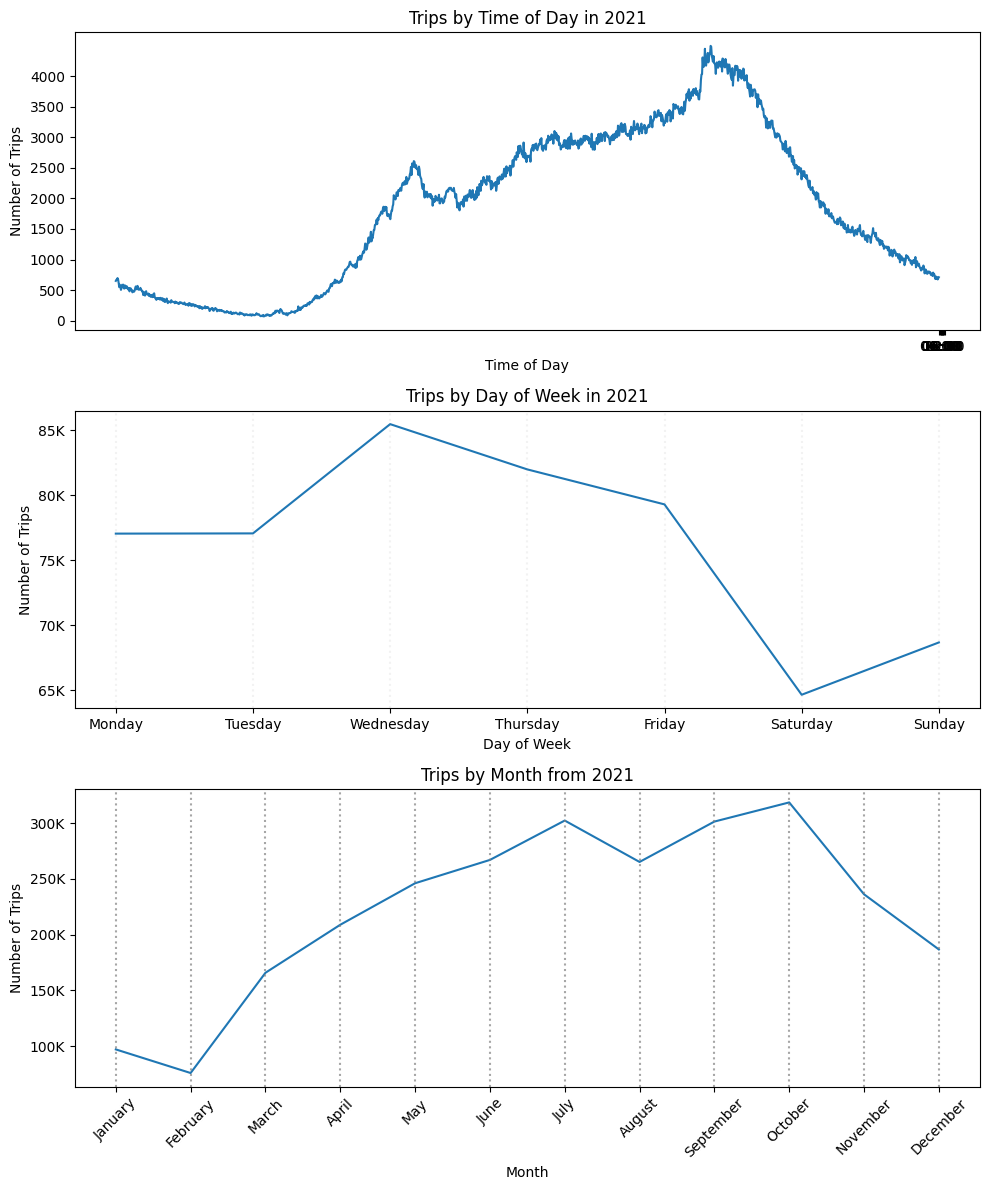

In [111]:
# Plotting the count data as line graphs
plt.figure(figsize=(10, 12))

# Line plot for trips by time of day
plt.subplot(3, 1, 1)
plt.plot(trips_by_time_of_day5.index, trips_by_time_of_day5)
plt.xlabel('Time of Day')
plt.ylabel('Number of Trips')
plt.title('Trips by Time of Day in 2021')
plt.yticks(range(0, max(trips_by_time_of_day5)+1,500), range(0, max(trips_by_time_of_day5)+1, 500))
# Simplify x-axis ticks for time of day plot
plt.xticks(['04:00','06:00','08:00', '10:00', '12:00', '14:00', '16:00', '18:00','20:00', '22:00'])

# # Add vertical dotted lines from each x-axis tick
# for xtick in trips_by_time_of_day.index:
#     plt.axvline(x=xtick, linestyle='dotted', color='gray', alpha=0.1)


# Format y-axis tick labels in thousands and avoid scientific notation for time of day plot
# formatter = FuncFormatter(lambda x, pos: '{:.0f}K'.format(x / 1000))
# plt.gca().yaxis.set_major_formatter(formatter)

# Line plot for trips by day of week
plt.subplot(3, 1, 2)
plt.plot(trips_by_day_of_week5.index, trips_by_day_of_week5)
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips')
plt.title('Trips by Day of Week in 2021')


# Add vertical dotted lines from each x-axis tick
for xtick in trips_by_day_of_week5.index:
    plt.axvline(x=xtick, linestyle='dotted', color='gray', alpha=0.1)

# Format y-axis tick labels in thousands and avoid scientific notation for day of week plot
plt.gca().yaxis.set_major_formatter(formatter)

# Line plot for trips by month
plt.subplot(3, 1, 3)
plt.plot(trips_by_month5.index, trips_by_month5)
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Trips by Month from 2021')
plt.xticks(rotation=45)

# Add vertical dotted lines from each x-axis tick
for xtick in trips_by_month4.index:
    plt.axvline(x=xtick, linestyle='dotted', color='gray', alpha=0.7)

# Format y-axis tick labels in thousands and avoid scientific notation for month plot
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

In [112]:
# Save As a CSV file To Google Drive
data_folder_path = "/content/drive/My Drive/MSCA31009MLPA_FinalProject/data/"

file_name = '/EDA2021.csv'
with open(data_folder_path+file_name, 'w', encoding = 'utf-8-sig') as f:
  df5_filtered.to_csv(f)

### Year 2022

In [5]:
# Specify the directory path: 
path = "/content/drive/My Drive/MSCA31009MLPA_FinalProject/data/2022"
!ls "/content/drive/My Drive/MSCA31009MLPA_FinalProject/data/2022"

202201-capitalbikeshare-tripdata.csv  202207-capitalbikeshare-tripdata.csv
202202-capitalbikeshare-tripdata.csv  202208-capitalbikeshare-tripdata.csv
202203-capitalbikeshare-tripdata.csv  202209-capitalbikeshare-tripdata.csv
202204-capitalbikeshare-tripdata.csv  202210-capitalbikeshare-tripdata.csv
202205-capitalbikeshare-tripdata.csv  202211-capitalbikeshare-tripdata.csv
202206-capitalbikeshare-tripdata.csv  202212-capitalbikeshare-tripdata.csv


In [6]:
# Loop through the files:
all_data = pd.DataFrame()  # Create an empty DataFrame to store the concatenated data
for file_name in os.listdir(path):
    if file_name.endswith(".csv"):
        file_path = os.path.join(path, file_name)
        data = pd.read_csv(file_path)
        all_data = pd.concat([all_data, data], ignore_index=True)
all_data.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,1B4445D591115BD9,classic_bike,2022-01-06 18:39:28,2022-01-06 18:43:03,Monroe Ave & Leslie Ave,31087.00,Potomac Ave & Main Line Blvd,31910.00,38.82,-77.05,38.82,-77.05,member
1,7F4A0E2F03EADEB7,classic_bike,2022-01-31 19:21:22,2022-01-31 19:27:33,14th & L St NW,31283.00,10th & G St NW,31274.00,38.90,-77.03,38.90,-77.03,member
2,30DD8A84164843AD,classic_bike,2022-01-07 15:28:39,2022-01-07 15:31:01,14th & L St NW,31283.00,12th & L St NW,31251.00,38.90,-77.03,38.90,-77.03,member
3,FC67665D7682D0A6,classic_bike,2022-01-27 20:09:25,2022-01-27 20:37:02,New York Ave & Hecht Ave NE,31518.00,Nannie Helen Burroughs & Minnesota Ave NE,31704.00,38.92,-76.98,38.90,-76.94,casual
4,7854F7CC4F631A1E,classic_bike,2022-01-07 16:14:28,2022-01-07 16:16:13,Falls Church City Hall / Park Ave & Little Fal...,32608.00,Pennsylvania Ave & Park Ave,32603.00,38.89,-77.17,38.89,-77.18,member


In [7]:
# Inspect the DataFrame:
df6 = all_data[['started_at', 'ended_at','start_station_id','start_station_name','end_station_id', 'end_station_name','member_casual']]

# Rename the columns
df6 = df6.rename(columns={
    'started_at': 'Start date',
    'ended_at': 'End date',
    'start_station_id': 'Start station number',
    'start_station_name': 'Start station',
    'end_station_id': 'End station number',
    'end_station_name': 'End station',
    'member_casual': 'Member type'
})

# Convert Station Number that are unnecessary in integer 
df6['Start date'] = pd.to_datetime(df6['Start date'])                     # Convert column to datetime type
df6['End date'] = pd.to_datetime(df6['End date'])                         # Convert column to datetime type

# Calculate the duration in seconds by subtracting 'End date' from 'Start date' and converting to seconds
df6['Duration'] = (df6['End date'] - df6['Start date']).dt.total_seconds()
df6 = df6[['Duration','Start date','Start station number','Start station',
           'End station number','End station', 'Member type']]
print(df6.info())      # Get information about the DataFrame, including column data types and missing values
print(df6.describe())  # Generate summary statistics of the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3476782 entries, 0 to 3476781
Data columns (total 7 columns):
 #   Column                Dtype         
---  ------                -----         
 0   Duration              float64       
 1   Start date            datetime64[ns]
 2   Start station number  float64       
 3   Start station         object        
 4   End station number    float64       
 5   End station           object        
 6   Member type           object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 185.7+ MB
None
        Duration  Start station number  End station number
count 3476782.00            3336962.00          3317243.00
mean     1425.66              31367.85            31369.71
std      9993.81                252.60              251.26
min     -7427.00              31000.00            31000.00
25%       408.00              31212.00            31215.00
50%       706.00              31276.00            31275.00
75%      1249.00   

In [8]:
# Handling missing values:
print(df6.shape)                 # Check the shape of DF after dropping na
df6.dropna()                     # Drop rows with any missing values
df6.drop_duplicates(inplace=True)# Drop rows with duplicates
print(df6.shape)                 # Check the shape of DF after dropping na
# We learn that this dataset has no missing data!
# Handle outliers: Given the duration is measured in second, lets set the upper limit as 7200 second that any trip longer than 3hrs.
df6_filtered = df6[(df6['Duration'] > 59) & (df6['Duration'] < 7200)]  # Filter out rows based on specified thresholds
print(f'The number of dropped outliers is: {len(df6)-len(df6_filtered)}')
print(df6_filtered.shape) 

(3476782, 7)
(3476492, 7)
The number of dropped outliers is: 100892
(3375600, 7)


In [9]:
# Replace the column values
df6_filtered['Member type'] = df6_filtered['Member type'].replace({'member': 'Member', 'casual': 'Casual'})

df6_filtered.head()

<ipython-input-9-b4fd77f556e2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6_filtered['Member type'] = df6_filtered['Member type'].replace({'member': 'Member', 'casual': 'Casual'})


,Duration,Start date,Start station number,Start station,End station number,End station,Member type
0,215.00,2022-01-06 18:39:28,31087.00,Monroe Ave & Leslie Ave,31910.00,Potomac Ave & Main Line Blvd,Member
1,371.00,2022-01-31 19:21:22,31283.00,14th & L St NW,31274.00,10th & G St NW,Member
2,142.00,2022-01-07 15:28:39,31283.00,14th & L St NW,31251.00,12th & L St NW,Member
3,1657.00,2022-01-27 20:09:25,31518.00,New York Ave & Hecht Ave NE,31704.00,Nannie Helen Burroughs & Minnesota Ave NE,Casual
4,105.00,2022-01-07 16:14:28,32608.00,Falls Church City Hall / Park Ave & Little Fal...,32603.00,Pennsylvania Ave & Park Ave,Member


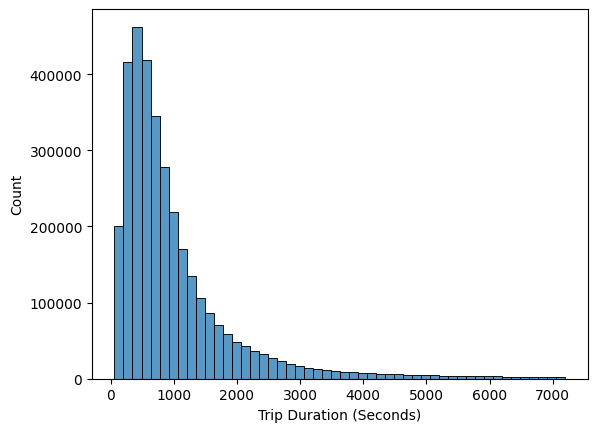

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram of trip duration
sns.histplot(df6_filtered['Duration'], bins=50)
plt.xlabel('Trip Duration (Seconds)')
plt.ylabel('Count')
plt.show()

In [11]:
# Extract 'time of day', 'day of week', and 'month' from the datetime column
df6_filtered['time_of_day'] = df6_filtered['Start date'].dt.strftime('%H:%M:')
df6_filtered['day_of_week'] = df6_filtered['Start date'].dt.strftime('%A')
df6_filtered['month']       = df6_filtered['Start date'].dt.strftime('%B')

# Data analysis by time of day
trips_by_time_of_day6 = df6_filtered.groupby('time_of_day')['Duration'].count()

# Data analysis by day of week
trips_by_day_of_week6 = df6_filtered.groupby('day_of_week')['Duration'].count()
# Fix the index order
days_of_week = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
trips_by_day_of_week6 = trips_by_day_of_week6.reindex(days_of_week)
# Data analysis by month
trips_by_month6 = df6_filtered.groupby('month')['Duration'].count()
# Fix the index order
months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
trips_by_month6 = trips_by_month6.reindex(months)

# Display the results
print("Trips by Time of Day:")
print(trips_by_time_of_day6)
print("\nTrips by Day of Week:")
print(trips_by_day_of_week6)
print("\nTrips by Month:")
print(trips_by_month6)

<ipython-input-11-47d422b5a0a7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6_filtered['time_of_day'] = df6_filtered['Start date'].dt.strftime('%H:%M:')
<ipython-input-11-47d422b5a0a7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6_filtered['day_of_week'] = df6_filtered['Start date'].dt.strftime('%A')
<ipython-input-11-47d422b5a0a7>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the cave

Trips by Time of Day:
time_of_day
00:00:    755
00:01:    796
00:02:    769
00:03:    832
00:04:    737
         ... 
23:55:    814
23:56:    808
23:57:    879
23:58:    858
23:59:    754
Name: Duration, Length: 1440, dtype: int64

Trips by Day of Week:
day_of_week
Monday       442196
Tuesday      472333
Wednesday    497167
Thursday     473901
Friday       498364
Saturday     543601
Sunday       448038
Name: Duration, dtype: int64

Trips by Month:
month
January      107546
February     151065
March        246498
April        300292
May          322604
June         377406
July         380312
August       366228
September    375484
October      324183
November     252953
December     171029
Name: Duration, dtype: int64


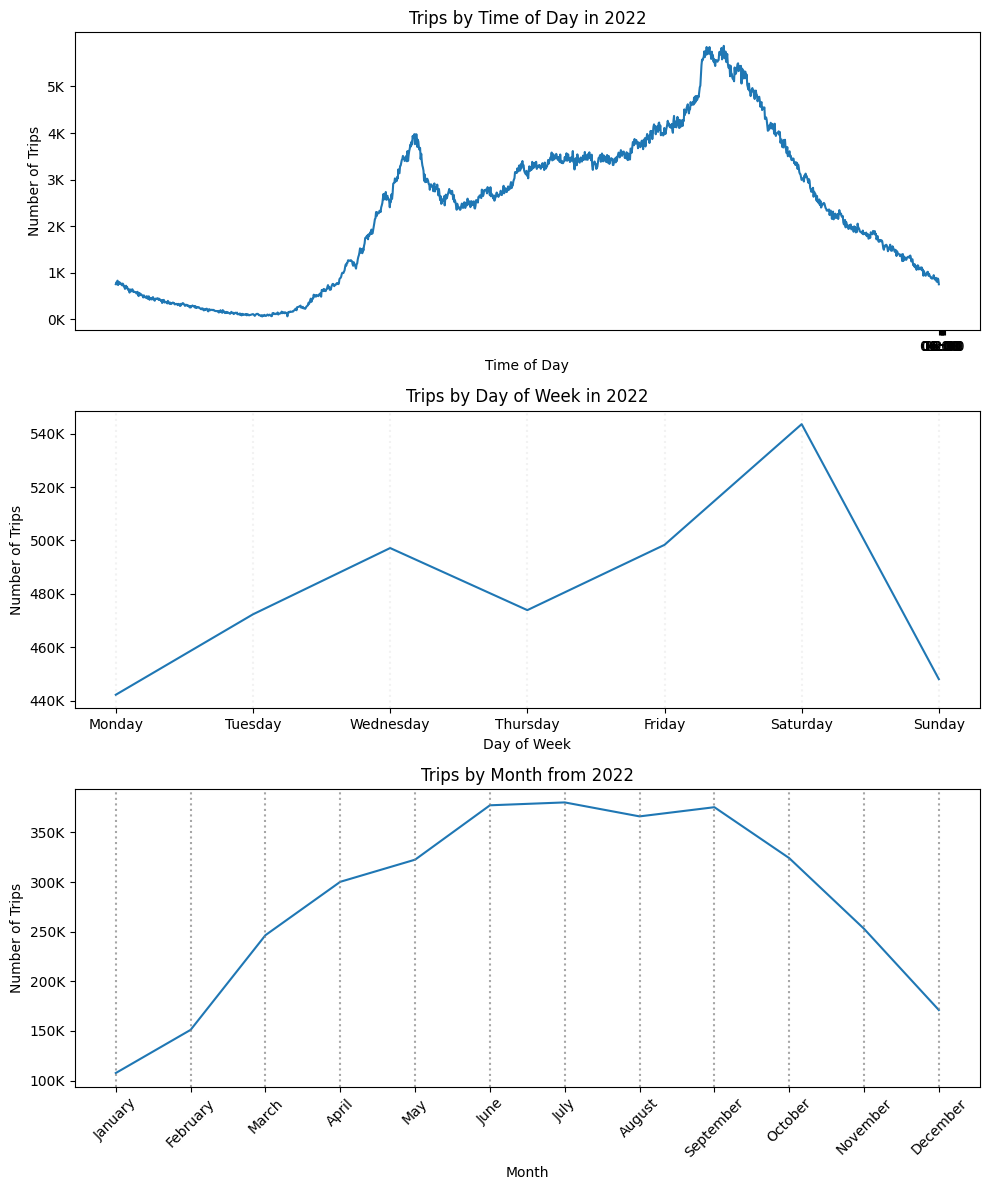

In [16]:
# Plotting the count data as line graphs
plt.figure(figsize=(10, 12))

# Line plot for trips by time of day
plt.subplot(3, 1, 1)
plt.plot(trips_by_time_of_day6.index, trips_by_time_of_day6)
plt.xlabel('Time of Day')
plt.ylabel('Number of Trips')
plt.title('Trips by Time of Day in 2022')
plt.yticks(range(0, max(trips_by_time_of_day6)+1,1000), range(0, max(trips_by_time_of_day6)+1, 1000))
# Simplify x-axis ticks for time of day plot
plt.xticks(['04:00','06:00','08:00', '10:00', '12:00', '14:00', '16:00', '18:00','20:00', '22:00'])

# # Add vertical dotted lines from each x-axis tick
# for xtick in trips_by_time_of_day.index:
#     plt.axvline(x=xtick, linestyle='dotted', color='gray', alpha=0.1)


# Format y-axis tick labels in thousands and avoid scientific notation for time of day plot
formatter = FuncFormatter(lambda x, pos: '{:.0f}K'.format(x / 1000))
plt.gca().yaxis.set_major_formatter(formatter)

# Line plot for trips by day of week
plt.subplot(3, 1, 2)
plt.plot(trips_by_day_of_week6.index, trips_by_day_of_week6)
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips')
plt.title('Trips by Day of Week in 2022')


# Add vertical dotted lines from each x-axis tick
for xtick in trips_by_day_of_week6.index:
    plt.axvline(x=xtick, linestyle='dotted', color='gray', alpha=0.1)

# Format y-axis tick labels in thousands and avoid scientific notation for day of week plot
plt.gca().yaxis.set_major_formatter(formatter)

# Line plot for trips by month
plt.subplot(3, 1, 3)
plt.plot(trips_by_month6.index, trips_by_month6)
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Trips by Month from 2022')
plt.xticks(rotation=45)

# Add vertical dotted lines from each x-axis tick
for xtick in trips_by_month6.index:
    plt.axvline(x=xtick, linestyle='dotted', color='gray', alpha=0.7)

# Format y-axis tick labels in thousands and avoid scientific notation for month plot
plt.gca().yaxis.set_major_formatter(formatter)

plt.tight_layout()
plt.show()

In [17]:
# Save As a CSV file To Google Drive
data_folder_path = "/content/drive/My Drive/MSCA31009MLPA_FinalProject/data/"

file_name = '/EDA2022.csv'
with open(data_folder_path+file_name, 'w', encoding = 'utf-8-sig') as f:
  df6_filtered.to_csv(f)